In [28]:
# import packages
import os, sys, glob, math
import numpy as np
import cv2
import matplotlib.pyplot as plt

from importlib import reload
from PIL import Image
from skimage.io import imshow
from skimage.measure import label
from scipy.ndimage import distance_transform_edt

sys.path.append('../')

import utils.DistanceMap as DistanceMap

In [2]:
# options
image_path = '../pennycress_pods/train/train_masks_by_pod/pods_early_600dpi_1.png'

wb = .5,
bwidth = 5


255 0
(454, 461, 3)


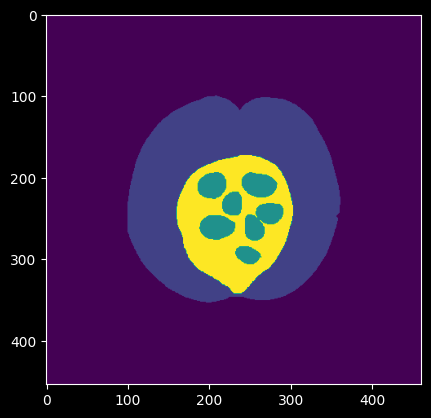

In [19]:
reload(DistanceMap)
image = Image.open(image_path)
image = np.array(image).astype('uint8')
print(image.max(), image.min())

print(image.shape)
plt.imshow(image)

# convert image to PIL and grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray) 

In [24]:

# label objects in grayscale image
labels = label(gray)

# get list of label ids
label_ids = sorted(np.unique(labels))

# initialize blank distance matrix
distances = np.zeros((image.shape[0], image.shape[1], len(label_ids)))

# calculate distance between each labeled object and other pixels
for i, label_id in enumerate(label_ids):
    distances[:,:,i] = distance_transform_edt(labels != label_id)

# sort distances
distances = np.sort(distances, axis=2)

# get two smallest distances (closest objects to each other)
d1 = distances[:,:,0]
d2 = np.zeros_like(d1)
if distances.shape[2] > 1:
    d2 = distances[:,:,1]

# calculate weights (border param. * exp(-1/2 * (d1 + d2) / sigma) * no_labels
w = wb * np.exp(-1/2*((d1 + d2) / bwidth)**2)


# if weight classes are provided
if wc:
    class_weights = np.ones_like(gray)
    # loop through weights and add to map
    for k, v in wc.items():
        if k == 'wing':
            class_weights[image[:, :, 0] == 255] = v
        elif k == 'env':
            class_weights[image[:, :, 1:].sum(-1) == 255] = v
        elif k == 'seed':
            class_weights[image[:, :, 2] == 255] = v
    w = w * class_weights


0.6586279095209511

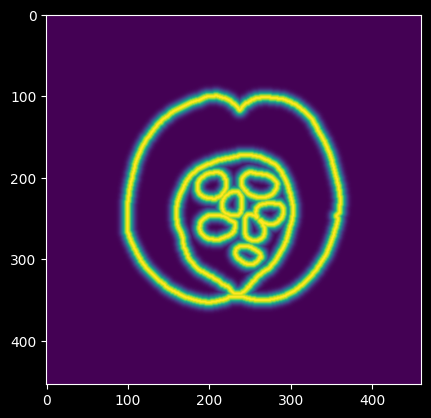